# K-Means Clustering

K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. I have used `Facebook Live Sellers in Thailand` dataset for this project.  K-Means clustering is implemented to find intrinsic groups within this dataset that display the same status_type behaviour. The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links).

## 1. Introduction to K-Means Clustering
Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

<b>K-Means clustering</b> is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

## 2. K-Means Clustering intuition
K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.

<b>Centroid</b> - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

#### 1. Data assignment step

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

#### 2. Centroid update step

In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.

The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

## 3. Choosing the value of K
The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the <b>elbow method</b> which is described below.

## 4. The elbow method
The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

If K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

## 5. The problem statement
In this project, I implement K-Means clustering with Python and Scikit-Learn. As mentioned earlier, K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. I have used `Facebook Live Sellers in Thailand Dataset` for this project. I implement K-Means clustering to find intrinsic groups within this dataset that display the same status_type behaviour. The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = 'Live_20210128.csv'
df = pd.read_csv(data)

In [4]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [5]:
df['status_id'].unique()

array([   1,    2,    3, ..., 7048, 7049, 7050], dtype=int64)

In [6]:
len(df['status_id'].unique())

7050

In [7]:
len(df['status_published'].unique())

6913

In [8]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [10]:
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [11]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [12]:
X = df
y = df['status_type']

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [14]:
cols = X.columns

In [15]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [16]:
X = pd.DataFrame(X, columns=[cols])

In [17]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [19]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

## Inertia
* <b>Inertia</b> is not a normalized metric.

* The lower values of inertia are better and zero is optimal.

* But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

* Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

* We can calculate model inertia as follows:-

In [20]:
kmeans.inertia_

237.75726404419564

* The lesser the model inertia, the better the model fit.
* We can see that the model has very high inertia. So, this is not a good model fit to the data.

In [21]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [22]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


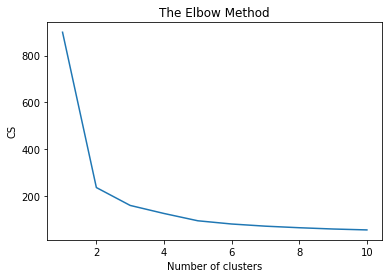

In [23]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


In [25]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [26]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [27]:
def cluster(predicted_label):
    if predicted_label==3:
        output = "Video"
    elif predicted_label ==2:
        output ="Photo"
    elif predicted_label ==1:
        output = "Status"
    else:
        output = "Link"
    return output

In [28]:
import numpy as np

# Assuming kmeans is your trained K-means model
input_data = np.array([[1.0,529, 512, 262, 432, 92, 3, 1, 1, 0]])  # Input data

predicted_label = kmeans.predict(input_data)
output = cluster(predicted_label)
print("Predicted cluster label:", output)

Predicted cluster label: Video


In [29]:
# Assuming kmeans is your trained K-means model
input_data = np.array([[0.33,529, 512, 262, 432, 92, 3, 1, 1, 0]])  # Input data

predicted_label = kmeans.predict(input_data)
output = cluster(predicted_label)
print("Predicted cluster label:", output)

Predicted cluster label: Video


In [30]:
input_data = np.array([[0.33,150,0,0,150,0,0,0,0,0]])  # Input data
predicted_label = kmeans.predict(input_data)
output = cluster(predicted_label)
print("Predicted cluster label:", output)

Predicted cluster label: Photo


In [31]:
input_data = np.array([[0.666666667,0.030573248,0.000714626,0.002336449,0.029723992,0.00608828,0,0,0,0]])  # Input data
predicted_label = kmeans.predict(input_data)
output = cluster(predicted_label)
print("Predicted cluster label:", output)

Predicted cluster label: Link


In [32]:
input_data = np.array([[0,0.050318471,0,0,0.048619958,0.00304414,0.021582734,0,0,0]])  # Input data
predicted_label = kmeans.predict(input_data)
output = cluster(predicted_label)
print("Predicted cluster label:", output)

Predicted cluster label: Status


In [36]:
input_data = np.array([[1,17,0,0,17,0,0,0,0,0]])  # Input data
predicted_label = kmeans.predict(input_data)
output = cluster(predicted_label)
print("Predicted cluster label:", output)

Predicted cluster label: Photo
